In [1]:
setwd("C:/Users/User/OneDrive/Documentos")
source("Meus Arquivos/Códigos/Funções.R")

In [2]:
pacotes <- c("tidyverse","tidyquant","mvtnorm","gtools")
for(i in pacotes){
  suppressPackageStartupMessages(library(i,character.only = T))
}
options(warn = -1)

In [3]:
acoes <- c("TRPL4.SA","ITSA4.SA","ENAT3.SA",
           "ABEV3.SA","FLRY3.SA","MGLU3.SA",
           "AGRO3.SA","B3SA3.SA")
retornos <- tq_get(acoes, from = "2013-01-01") %>%
  group_by(symbol)%>%
  tq_transmute(select = adjusted, mutate_fun = dailyReturn) %>%
  spread(key = symbol, value = daily.returns) %>%
  na.omit()

In [4]:
cova <- retornos %>%
  .[,-1] %>%
  cov()
medias <- retornos %>%
  .[,-1] %>%
  colMeans()
tx_juros <- 0.02

In [5]:
otimo <- otimizacao(ret = medias*252, cov = cova*252, r_l = tx_juros, short = T)
pesos <- c(0.2645,0.1147,0.0762,0.1042,0.0863,0.0751,0.0816,0.1975)
pe <- data.frame(symbol = acoes, pesos = pesos)
pe <- pe[mixedorder(pe$symbol),]
pe$pesos <- pe$pesos/sum(pe$pesos)
pesos <- pe$pesos

In [15]:
n_sim <- 5000
n_days <- 252

In [16]:
simulacao <- matrix(nrow = n_days, ncol = n_sim)
for(i in 1:n_sim){
  sim <- rmvnorm(n_days, mean = medias, sigma = cova)
  sim[1,] <- 0
  sim <- apply(sim+1,2,cumprod)
  simulacao[,i] <- apply(sim,1,function(sim,pesos)sim%*%pesos, pesos = pesos)
}

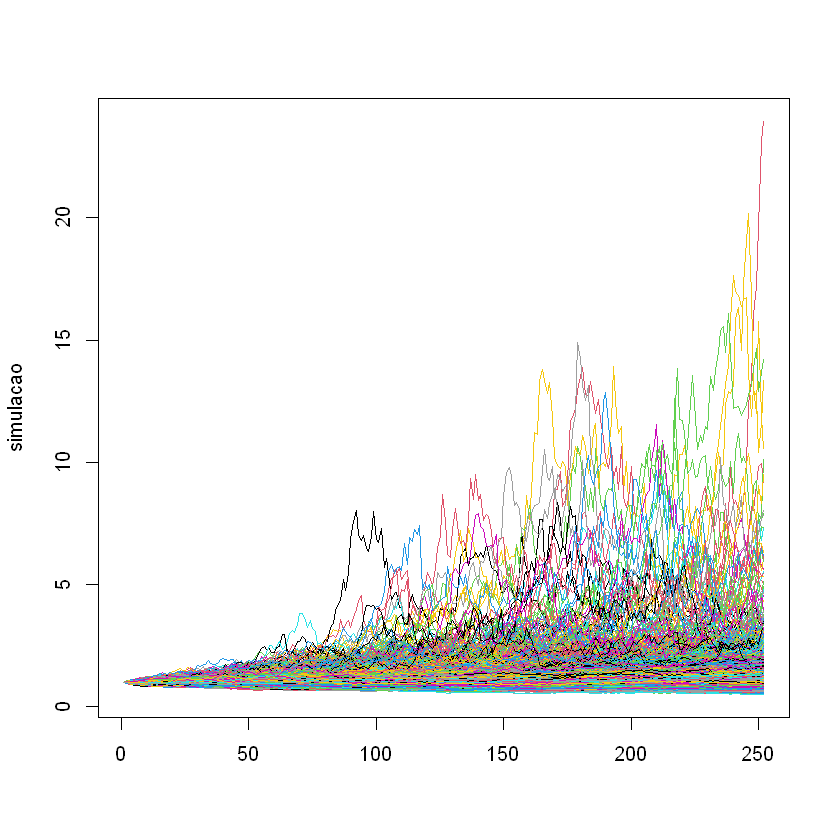

In [17]:
matplot(simulacao, type = "l", lty = 1, col = 1:n_sim)

In [18]:
mean(simulacao[n_days,] >= 1)

[1] 0.804

In [21]:
print(medias*252)

  ABEV3.SA   AGRO3.SA   B3SA3.SA   ENAT3.SA   FLRY3.SA   ITSA4.SA   MGLU3.SA 
0.06858897 0.19542398 0.29807588 0.19323076 0.23083577 0.19234649 0.55116684 
  TRPL4.SA 
0.33700231 
